# 🍎 파이썬 머신러닝 완벽 가이드 혼공

### 2019.04.13 ~ 2019.04.19 교재 06장

06. 차원축소

### 02. PCA 

가장 분산이 큰 데이터 축을 기준으로 차원축소하는데 이 축을 주성분이라고 함. 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

iris = load_iris()

# 넘파이 데이터 세트를 데이터프레임으로 변환 
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target 
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


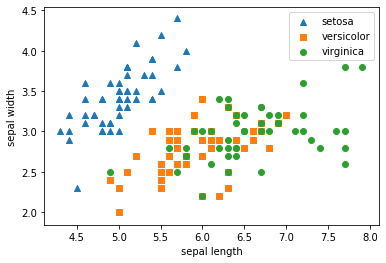

In [2]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

세모는 대충 알수 있는데, 나머지는 알수가 없음. 요 두가지로는 구별이 힘든 듯. 

그럼 2차원으로 pca 변환을 해보자!

In [3]:
from sklearn.preprocessing import StandardScaler 

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])  #pca 변환 전 스케일링이 필요함 

In [4]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)  # pca로 변환

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape  # 넘파이로 표시 

(150, 2)

In [5]:
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target 
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


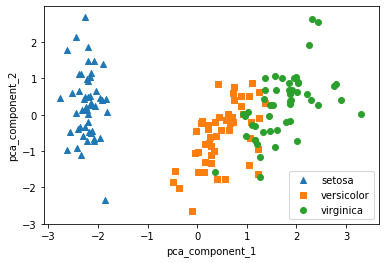

In [6]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

pca 변환후 파란색은 여전히 잘 구별이 되고, 이전보다 주황색과 초록색의 구별이 잘 되는 것 같음. pca의 첫번째 새로운 축 pca_component_1이 원본 데이터의 변동성을 잘 반영한것이라고 볼 수 있음.

In [7]:
pca.explained_variance_ratio_  # PCA component별로 원본 데이터의 변동성을 얼마나 반영하고 있는가? 

array([0.72962445, 0.22850762])

첫번째 변환요소가 72%, 두번째 변환요소가 22%를 설명해서 이 두개가 총 95% 정도로 변동성을 설명한다고 볼 수 있음. 

이를 기반으로 분류를 하여 결과를 에측해보겠음. 원본 데이터로 할 경우와 pca로 차원축소를 할 경우를 비교해볼 것.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 원본 데이터로 했을 때 ! 
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98039216 0.92156863 0.97916667]
원본 데이터 평균 정확도: 0.960375816993464


/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
# pca를 적용해서 했을 때!
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores_pca)
print('원본 데이터 평균 정확도:', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도: [0.8627451  0.84313725 0.89583333]
원본 데이터 평균 정확도: 0.8672385620915034


/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


그러나 성능은 낮아짐. 그런데 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려하면 원본 데이터의 특성을 상당수 유지하고 있다고 볼 수 있음. 

좀 더 많은 피처를 가진 데이터를 차원축소해보자.

In [10]:
import pandas as pd
 
df = pd.read_excel('data/06. credit_card.xls', header=1, sheet_names='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


피처 겁나 많음. 분류니까 마지막 컬럼이 타겟값. 다음달 연체 여부 1, 아니면 0

In [11]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month': 'default'}, inplace=True)
y_target = df['default']


In [12]:
X_features = df.drop('default',1)

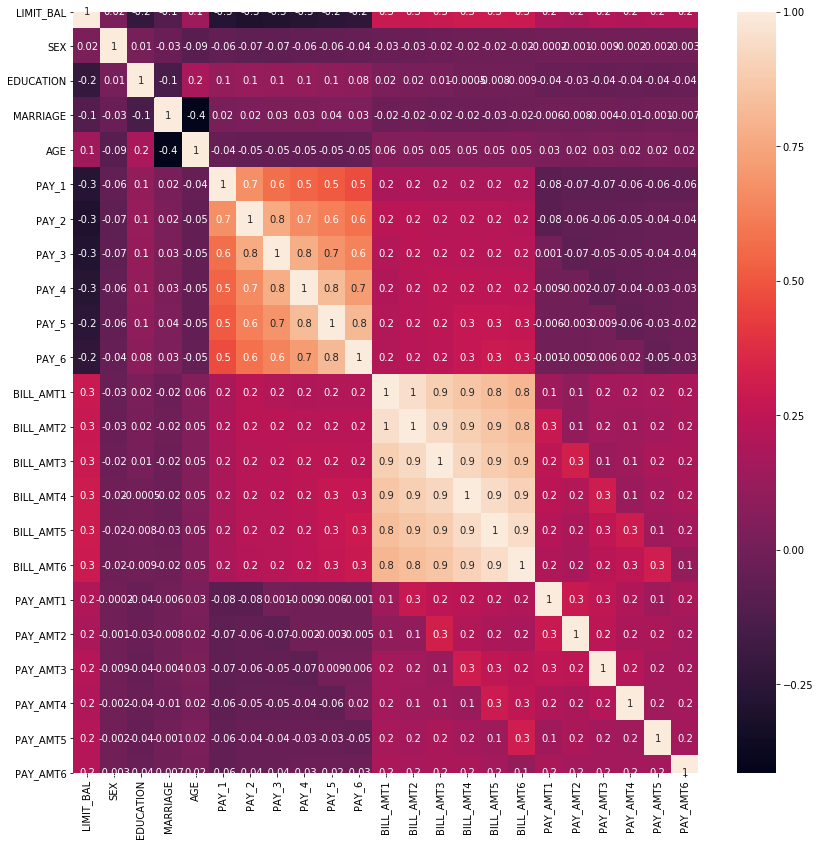

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

연한 부분이 상관도 높은 것. 이 상관도 높은 소수의 pca만으로 자연스럽게 이 속성의 변동성을 수용할 수 있음. 저 흰 부분 BILL6개로 pca 해볼 것임.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print(cols_bill)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [15]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill]) # 정규화해주고! 
pca = PCA(n_components=2) # pca 객체 생성
pca.fit(df_cols_scaled) # 6개 컬럼만 변환
print(pca.explained_variance_ratio_)

[0.90555253 0.0509867 ]


95%의 변동성을 설명한다네! 첫번째 축이 거의 90%를 설명하는 군. 

이것으로 또 실제 데이터와 비교해서 생각해보자.

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features) # 정규화해주고! 

pca = PCA(n_components=6) # pca 객체 생성
df_pca = pca.fit_transform(df_scaled) # 6개 컬럼만 변환
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우 개별 Fold세트별 정확도:', scores_pca)
print('평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우 개별 Fold세트별 정확도: [0.7923 0.798  0.8006]
평균 정확도:0.7970


In [18]:
pca.explained_variance_ratio_

array([0.28448215, 0.17818817, 0.06743306, 0.06401154, 0.04457516,
       0.04161711])

### 03. LDA

선형 판별 분석법. pca는 입력 데이터의 변동성의 가장 큰 축을 찾지만, lca는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음. 지도학습의 분류에 사용하기 쉽도록. 분산분석할 때의 원리와 똑같음. 클래스 구별할 때 클래스들 간의 분산은 큰 것과 클래스들 내부 사이의 분산은 작은 것으로 구별함.

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data) # 정규화~ 

lda는 지도학습이라 클래스의 결정값이 변환 시에 필요함.

In [20]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # 피처 뿐만 아니라 클래스 결정값도 넣는다! 
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


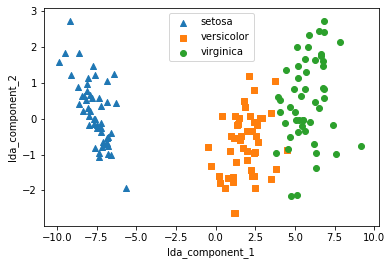

In [21]:
lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='best')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### 04. SVD 

In [22]:
# 넘파이 svd 모듈 사용 
import numpy as np 
from numpy.linalg import svd 

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [25]:
U, Sigma, Vt = svd(a)  # return these 3
print(U.shape, Sigma.shape, Vt.shape)
print(np.round(U,3),'\n')
print(np.round(Sigma,3),'\n')
print(np.round(Vt, 3))

(4, 4) (4,) (4, 4)
[[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]] 

[3.423 2.023 0.463 0.079] 

[[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [26]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [27]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [28]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print(np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
[2.663 0.807 0.    0.   ]


In [29]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [32]:
import numpy as np 
from scipy.sparse.linalg import svds 
from scipy.linalg import svd 

np.random.seed(121)
matrix = np.random.random((6,6))
print(matrix)

U, Sigma, Vt = svd(matrix, full_matrices=False)
print(U.shape, Sigma.shape, Vt.shape)
print(Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print(U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print(Sigma_tr)

matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print(matrix_tr)

[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
(6, 6) (6,) (6, 6)
[3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]
(6, 4) (4,) (4, 6)
[0.55463089 0.83865238 0.88116505 3.2535007 ]
[[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


Text(0, 0.5, 'TruncatedSVD Component 2')

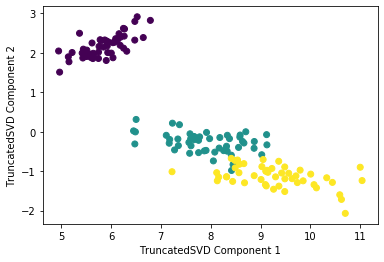

In [33]:
# using sklearn TruncatedSVD

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
%matplotlib inline 

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Trnasformed')

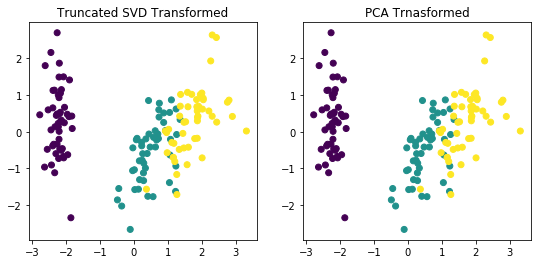

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Trnasformed')

### 05. NMF

Text(0, 0.5, 'NMF Component 2')

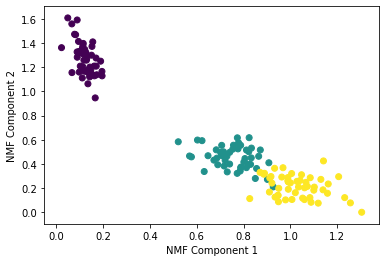

In [35]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')